In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections
from tqdm import trange
import seaborn as sns
import random

font = {        'size'   : 15}
import matplotlib
matplotlib.rc('font', **font)

import pandas as pd
import time

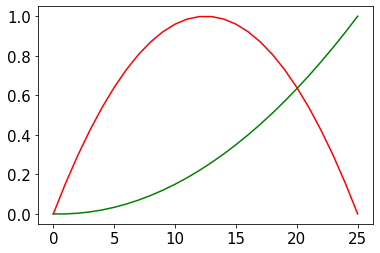

In [133]:
N = 25
C = np.arange(N+1)
x = C*(C-1)/2/(N*(N-1)/2)
y = (N-C)*C/2/(N**2/8)
plt.plot(C,x,c='g')
plt.plot(C,y,c='r')
# plt.plot(C,2*x+y,c='k')

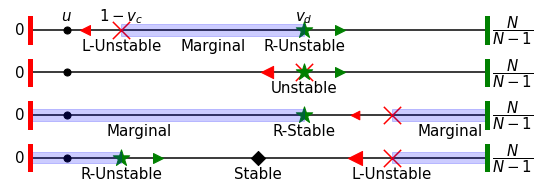

In [26]:
fig,axs=plt.subplots(ncols=1,nrows=4,figsize=(9,3))

end=25
v_d = 15
# Number line
axs[0].plot([0,end],[0,0],c='k',zorder=0)
# axs[0].plot([10,10],[-0.5,0.5],c='k')

# v_c,v_d,C
axs[0].scatter(5,0,s=300,marker='x',c='r',zorder=1)
axs[0].scatter(3,0,s=100,marker='<',c='r',zorder=1)
axs[0].text(5,0.8,r'$1-v_c$',horizontalalignment='center')

axs[0].scatter(v_d,0,s=300,marker='*',c='g',label=r'$v_d$',zorder=1)
axs[0].scatter(v_d+2,0,s=100,marker='>',c='g',label=r'$v_d$',zorder=1)
axs[0].text(v_d,0.8,r'$v_d$',horizontalalignment='center')

axs[0].scatter(2,0,s=50,c='k')
axs[0].text(2,0.8,r'$u$',horizontalalignment='center')

# Absorbing states + area
axs[0].plot([0,0],[-1,1],c='r',lw=5)
axs[0].plot([end,end],[-1,1],c='g',lw=5)
axs[0].text(-0.3,0,'0',horizontalalignment='right',verticalalignment='center')
axs[0].text(end+0.3,0,r'$\dfrac{N}{N-1}$',verticalalignment='center')
axs[0].fill_between([5,v_d],[-1/2]*2,[1/2]*2,color='b',alpha=0.2)
axs[0].text((v_d+5)/2,-0.7,'Marginal',horizontalalignment='center',verticalalignment='top')
axs[0].text(5,-0.7,'L-Unstable',horizontalalignment='center',verticalalignment='top')
axs[0].text(v_d,-0.7,'R-Unstable',horizontalalignment='center',verticalalignment='top')
axs[0].axis('off')
axs[0].set_ylim([-1.5,1.5])


# Number line
axs[1].plot([0,end],[0,0],c='k',zorder=0)
# axs[1].plot([10,10],[-0.5,0.5],c='k')

# v_c,v_d,C
axs[1].scatter(v_d,0,s=300,marker='x',c='r',zorder=1)
axs[1].scatter(v_d-2,0,s=150,marker='<',c='r',zorder=1)
# axs[1].text(5,0.8,r'$1-v_c$',horizontalalignment='center')

axs[1].scatter(v_d,0,s=300,marker='*',c='g',label=r'$v_d$',zorder=1)
axs[1].scatter(v_d+2,0,s=100,marker='>',c='g',label=r'$v_d$',zorder=1)
# axs[1].text(15,0.8,r'$v_d$',horizontalalignment='center')

axs[1].scatter(2,0,s=50,c='k')
# axs[1].text(12,0.8,r'$C/N$',horizontalalignment='center')

# Absorbing states + area
axs[1].plot([0,0],[-1,1],c='r',lw=5)
axs[1].plot([end,end],[-1,1],c='g',lw=5)
axs[1].text(-0.3,0,'0',horizontalalignment='right',verticalalignment='center')
axs[1].text(end+0.3,0,r'$\dfrac{N}{N-1}$',verticalalignment='center')
# axs[1].fill_between([5,15],[-1/2]*2,[1/2]*2,color='b',alpha=0.2)
axs[1].text(v_d,-0.7,'Unstable',horizontalalignment='center',verticalalignment='top')
axs[1].axis('off')
axs[1].set_ylim([-1.5,1.5])


# Number line
axs[2].plot([0,end],[0,0],c='k',zorder=0)
# axs[2].plot([10,10],[-0.5,0.5],c='k')

# v_c,v_d,C
axs[2].scatter(v_d+4.8,0,s=300,marker='x',c='r',zorder=1)
axs[2].scatter(v_d+2.8,0,s=75,marker='<',c='r',zorder=1)
# axs[1].text(5,0.8,r'$1-v_c$',horizontalalignment='center')

axs[2].scatter(v_d,0,s=300,marker='*',c='g',label=r'$v_d$',zorder=1)
# axs[2].scatter(v_d+3,0,s=100,marker='>',c='g',label=r'$v_d$',zorder=1)
# axs[1].text(15,0.8,r'$v_d$',horizontalalignment='center')

axs[2].scatter(2,0,s=50,c='k')
# axs[1].text(12,0.8,r'$C/N$',horizontalalignment='center')

# Absorbing states + area
axs[2].plot([0,0],[-1,1],c='r',lw=5)
axs[2].plot([end,end],[-1,1],c='g',lw=5)
axs[2].text(-0.3,0,'0',horizontalalignment='right',verticalalignment='center')
axs[2].text(end+0.3,0,r'$\dfrac{N}{N-1}$',verticalalignment='center')
axs[2].fill_between([0,v_d],[-1/2]*2,[1/2]*2,color='b',alpha=0.2)
axs[2].fill_between([v_d+4.8,end],[-1/2]*2,[1/2]*2,color='b',alpha=0.2)
axs[2].text(v_d,-0.7,'R-Stable',horizontalalignment='center',verticalalignment='top')
# axs[2].text(v_d+4.8,0.7,'L-Stable',horizontalalignment='center',verticalalignment='bottom')
axs[2].text(6,-0.7,'Marginal',horizontalalignment='center',verticalalignment='top')
axs[2].text(end-0.2,-0.7,'Marginal',horizontalalignment='right',verticalalignment='top')
axs[2].axis('off')
axs[2].set_ylim([-1.5,1.5])


# Number line
axs[3].plot([0,end],[0,0],c='k',zorder=0)
# axs[2].plot([10,10],[-0.5,0.5],c='k')

# v_c,v_d,C
axs[3].scatter(v_d+4.8,0,s=300,marker='x',c='r',zorder=1)
axs[3].scatter(v_d+2.8,0,s=200,marker='<',c='r',zorder=1)
# axs[1].text(5,0.8,r'$1-v_c$',horizontalalignment='center')

axs[3].scatter(5,0,s=300,marker='*',c='g',label=r'$v_d$',zorder=1)
axs[3].scatter(7,0,s=100,marker='>',c='g',label=r'$v_d$',zorder=1)
# axs[1].text(15,0.8,r'$v_d$',horizontalalignment='center')

axs[3].scatter(2,0,s=50,c='k')
# axs[1].text(12,0.8,r'$C/N$',horizontalalignment='center')

# Absorbing states + area
axs[3].plot([0,0],[-1,1],c='r',lw=5)
axs[3].plot([end]*2,[-1,1],c='g',lw=5)
axs[3].text(-0.3,0,'0',horizontalalignment='right',verticalalignment='center')
axs[3].text(end+0.3,0,r'$\dfrac{N}{N-1}$',verticalalignment='center')
axs[3].fill_between([0,5],[-1/2]*2,[1/2]*2,color='b',alpha=0.2)
axs[3].fill_between([v_d+4.8,end],[-1/2]*2,[1/2]*2,color='b',alpha=0.2)
axs[3].text(5,-0.7,'R-Unstable',horizontalalignment='center',verticalalignment='top')
axs[3].text(v_d+4.8,-0.7,'L-Unstable',horizontalalignment='center',verticalalignment='top')
axs[3].scatter(end/2,0,marker='D',color='k',s=100)
axs[3].text(end/2,-0.7,'Stable',horizontalalignment='center',verticalalignment='top')
axs[3].axis('off')
axs[3].set_ylim([-1.5,1.5])

fig.savefig("Imitate2_stability.png",bbox_inches='tight')

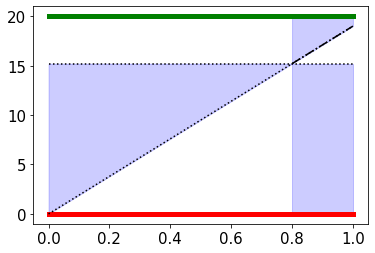

In [21]:
v_d = 0.8
N=20
plt.plot([0,1],[N]*2,c='g',lw=5)
plt.plot([0,1],[0]*2,c='r',lw=5)
plt.plot([0,1],[0,N-1],'k:')
plt.plot([0,1],[v_d*(N-1)]*2,'k:')
# plt.plot([v_d]*2,[0,N],'k',lw=0.5)
plt.plot([v_d,1],[v_d*(N-1),N-1],'k-.')

plt.fill_between([0,v_d],[0,v_d*(N-1)],[v_d*(N-1)]*2,color='b',alpha=0.2)
plt.fill_between([v_d,1],[v_d*(N-1),N-1],[N]*2,color='b',alpha=0.2)
plt.fill_between([v_d,1],[0]*2,[v_d*(N-1)]*2,color='b',alpha=0.2)

# testing random numbers

10000 random numbers:
a) generate per iteration (random.random) # slowest by 10 times
b) save as an array ala np.random.random() # fastest
c) save as an array ala np.random.uniform() # next fastest

In [4]:
start = time.time()
for i in range(100000):
    if random.random

In [21]:
%timeit np.random.random(10000)
%timeit np.random.uniform(size=10000)
%timeit [random.random() for i in range(10000)]

65.3 µs ± 2.88 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
76.5 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
973 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [2]:
p = 0.8
N = 1000000
def fn_a():
    for i in range(N):
        if random.random() <= p:
            continue;
def fn_b():
    q = np.random.random(N)
    for i in range(N):
        if q[i] <= p:
            continue;
            
def fn_c():
    q = np.random.random(N)
    event = q <= p
    for i in range(N):
        if event[i]:
            continue;

In [3]:
%timeit fn_a() # iterating random.random in a for loop
%timeit fn_b() # save first then access
%timeit fn_c() # compare against the probability as an entire vector operation
# %timeit fn_d()

113 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
227 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
79.1 ms ± 874 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# CONCLUSION:
if you can compare the vector of randnumbers to the event-probability outside of the for loop, do it.
otherwise comparing and generating the native random.random to p every iteration is quicker.

# testing different des

Starting with empty graphs

In [2]:
from cooperate_defect_module import evolve
def measure_xy(g):
    x=0
    y=0
    for u,v in list(g.edges()):
        if g.nodes[u]['C']&g.nodes[v]['C']:
            x+=1
        elif g.nodes[u]['C']|g.nodes[v]['C']:
            y+=1
    return x,y

In [8]:
N=20
C=15
T=int(N*(N-1)/2)
b=100
c=50
pi_star = (b-c)/(2*N) * C * (N+C-2) 
t=np.arange(0,5*T+1)

In [10]:
# For complete graphs pi_0 = C*(N-1)
pi_0 = C*(N-1)*(b-c)/N
x0 = C*(C-1)/2
y0 = (N-C)*C

x = C*(C-1)/2 + (x0 - C*(C-1)/2)*np.exp(-t/T)
y = C*(N-C)/2 + (y0 - C*(N-C)/2)*np.exp(-t/T)

pi_xy = (b-c)/N * (2*x+y)
pi_k = pi_star - (pi_star - pi_0)*np.exp(-t/T)

In [6]:
runs=100
avg_payoffs = np.zeros((runs,int(5*T+1)))
xy = np.zeros((runs,5*T+1,2))
for r in trange(runs):
    g1=nx.complete_graph(N)
    nx.set_node_attributes(g1,{n:int(n<C) for n in range(N)},'C')
    avg_payoffs[r,:]= evolve(g1,5*T,zeta=0,eta=0).mean(axis=0)
    
#     xy[r,0,:]=measure_xy(g1)
#     g = evolve(g1,5*T,graph=True,zeta=0,eta=0)
#     for i in range(1,5*T+1):
#         xy[r,i,:] = measure_xy(g[i])

100%|██████████| 100/100 [00:36<00:00,  2.75it/s]


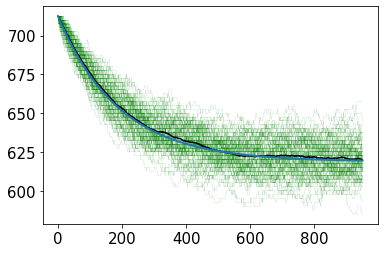

In [12]:
for r in range(runs):
#     plt.plot(t,(2*xy[r,:,0]+xy[r,:,1])*(b-c)/N,c='orange',lw=0.1)
    plt.plot(t,avg_payoffs[r,:],lw=0.1,c='g')
# plt.plot(t,pi_xy,c='k',lw=2)
plt.plot(t,avg_payoffs.mean(axis=0),c='k')
plt.plot(t,pi_k,lw=2)

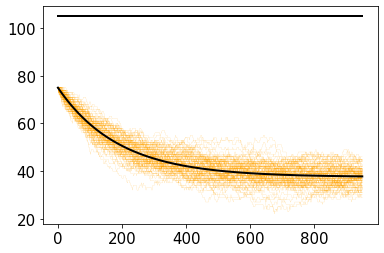

In [64]:
for r in range(runs):
    plt.plot(t,xy[r,:,0],c='green',lw=0.1)
    plt.plot(t,xy[r,:,1],c='orange',lw=0.1)
#     plt.plot(t,avg_payoffs[r,:],lw=0.1,c='g')
plt.plot(t,x,c='k',lw=2)
plt.plot(t,y,c='k',lw=2)
# plt.plot(t,pi_k,lw=2)